In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb

In [2]:
df = pd.read_excel(r"C:\Users\saqli\Desktop\Df.xlsx")
x = df.iloc[:,2:6]
y = df[['delta_E']]

In [3]:
df.head()

,Treatment_code,Treatment,Days,Alginate,Guargum,Pectin,Weightloss,Firmness,TSS,pH,L,a,b,delta_E,TPC,DPPH,inhibition
0,Control,0,2,0.0,0.0,0.0,18.19776,468.69,4.6,4.11,14.51,4.14,19.10,9.398904,816.88,0.108,82.32
1,x1,1,2,3.0,0.0,0.0,18.43008,457.32,5.9,4.07,14.79,7.66,19.24,7.734145,811.88,0.128,79.05
2,x2,2,2,0.0,3.0,0.0,18.33792,513.90,5.8,4.08,20.34,14.48,21.83,7.604591,436.88,0.056,90.84
3,x3,3,2,0.0,0.0,3.0,18.47232,591.24,6.1,4.14,17.86,11.75,18.80,5.112592,338.13,0.051,91.65
4,x1*x2,4,2,1.5,1.5,0.0,18.60288,632.79,6.4,4.05,19.25,10.39,15.69,2.631045,413.13,0.039,93.62


In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .2, random_state = 42)

In [5]:
svr = SVR()

In [6]:
svr.fit(x_train,y_train)

c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [7]:
y_pred_ = svr.predict(x_test)

In [8]:
y_pred_

array([13.09935839,  7.51184633, 13.09935839, 10.83774382, 13.20581875,
       10.83774382, 13.20581875,  7.44842168,  7.31556203,  9.21367459,
       13.20581875,  7.31556203, 10.34713465, 12.15188645, 12.21205648,
        7.2885537 , 13.66334411, 11.36978853, 13.66334411,  7.51184633])

In [9]:
# Calculate the metrics
mse = mean_squared_error(y_test, y_pred_)
mae = mean_absolute_error(y_test, y_pred_)
r2 = r2_score(y_test, y_pred_)

# Print the results
print('SVM result:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

SVM result:
Mean Squared Error: 9.1352
Mean Absolute Error: 2.5472
R² Score: 0.5941


In [13]:
from pyswarms.single.global_best import GlobalBestPSO
from pyswarms.utils.functions import single_obj as fx
import numpy as np
from sklearn.model_selection import cross_val_score

2025-05-08 04:37:18,106 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|50/50, best_cost=3.2 
2025-05-08 04:37:21,335 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.1973298802246086, best pos: [43.10773266  0.29720639  0.20751973]
c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal SVR Parameters:
C: 43.1077
epsilon: 0.2972
gamma: 0.2075

Optimized SVR Results:
Mean Squared Error: 6.3700
Mean Absolute Error: 1.6133
R² Score: 0.7169


c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(



Optimal Treatment and Storage Conditions:
Days: 2.0816
Alginate: 1.8367
Guargum: 0.8571
Pectin: 0.3061
Predicted outcome: 2.9725


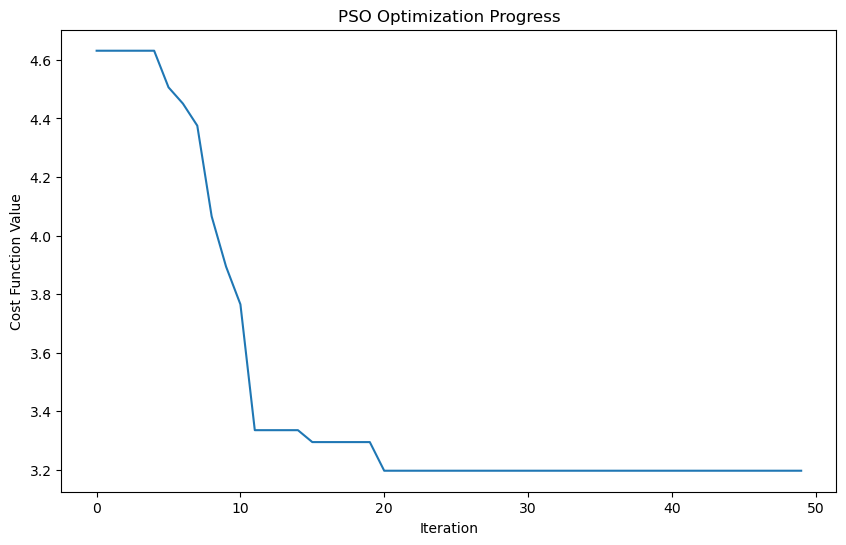

In [14]:
# Define the objective function for PSO
def objective_function(params, X=x_train, y=y_train):
    # Extract parameters
    C, epsilon, gamma = params[0]
    
    # Create SVR model with current parameters
    svr = SVR(C=float(C), epsilon=float(epsilon), gamma=float(gamma))
    
    # Perform cross-validation
    scores = cross_val_score(svr, X, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    # Return negative mean score (PSO minimizes the objective function)
    return -scores.mean()

# Set up hyperparameter bounds
bounds = (
    [0.1, 0.001, 0.001],  # lower bounds
    [100, 1.0, 10.0]      # upper bounds
)

# Initialize PSO optimizer
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=20, dimensions=3, options=options, bounds=bounds)

# Optimize hyperparameters
best_cost, best_pos = optimizer.optimize(objective_function, iters=50)

# Create and train SVR with optimal parameters
best_svr = SVR(
    C=float(best_pos[0]),
    epsilon=float(best_pos[1]),
    gamma=float(best_pos[2])
)
best_svr.fit(x_train, y_train)

# Print optimal parameters
print("Optimal SVR Parameters:")
print(f"C: {best_pos[0]:.4f}")
print(f"epsilon: {best_pos[1]:.4f}")
print(f"gamma: {best_pos[2]:.4f}")

# Generate predictions with optimized model
y_pred_optimized = best_svr.predict(x_test)

# Calculate and print metrics for optimized model
mse = mean_squared_error(y_test, y_pred_optimized)
mae = mean_absolute_error(y_test, y_pred_optimized)
r2 = r2_score(y_test, y_pred_optimized)

print('\nOptimized SVR Results:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

# Find optimal treatment and storage conditions
# Create a grid of possible conditions
feature_ranges = []
for column in x.columns:
    feature_ranges.append(np.linspace(x[column].min(), x[column].max(), 50))

grid = np.meshgrid(*feature_ranges)
all_combinations = np.column_stack([g.ravel() for g in grid])

# Predict outcomes for all combinations
predictions = best_svr.predict(all_combinations)

# Find the combination with the best predicted outcome
best_idx = np.argmin(predictions)  # or argmax, depending on your goal
optimal_conditions = all_combinations[best_idx]

print('\nOptimal Treatment and Storage Conditions:')
for i, column in enumerate(x.columns):
    print(f'{column}: {optimal_conditions[i]:.4f}')
print(f'Predicted outcome: {predictions[best_idx]:.4f}')

# Visualize optimization progress
plt.figure(figsize=(10, 6))
plt.plot(optimizer.cost_history)
plt.title('PSO Optimization Progress')
plt.xlabel('Iteration')
plt.ylabel('Cost Function Value')
plt.show()

In [15]:
from scipy.optimize import differential_evolution
import numpy as np
from sklearn.model_selection import cross_val_score

In [16]:
def objective_function(params):
    C, epsilon, gamma = params
    
    # Create SVR model with current parameters
    svr = SVR(C=float(C), epsilon=float(epsilon), gamma=float(gamma))
    
    # Perform cross-validation
    scores = cross_val_score(svr, x_train, y_train.values.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    # Return negative mean score (DE minimizes the objective function)
    return -scores.mean()

# Define parameter bounds
bounds = [
    (0.1, 100.0),    # C
    (0.001, 1.0),    # epsilon
    (0.001, 10.0)    # gamma
]

# Run Differential Evolution
result = differential_evolution(
    objective_function,
    bounds,
    strategy='best1bin',
    maxiter=50,
    popsize=20,
    tol=0.01,
    mutation=(0.5, 1.0),
    recombination=0.7,
    seed=42
)

# Create and train SVR with optimal parameters
best_svr = SVR(
    C=float(result.x[0]),
    epsilon=float(result.x[1]),
    gamma=float(result.x[2])
)
best_svr.fit(x_train, y_train)

# Print optimization results
print("Differential Evolution Results:")
print(f"Success: {result.success}")
print(f"Number of iterations: {result.nit}")

print("\nOptimal SVR Parameters:")
print(f"C: {result.x[0]:.4f}")
print(f"epsilon: {result.x[1]:.4f}")
print(f"gamma: {result.x[2]:.4f}")

# Generate predictions with optimized model
y_pred_optimized = best_svr.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_optimized)
mae = mean_absolute_error(y_test, y_pred_optimized)
r2 = r2_score(y_test, y_pred_optimized)

print('\nOptimized SVR Results:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

# Find optimal treatment and storage conditions
feature_ranges = []
for column in x.columns:
    feature_ranges.append((x[column].min(), x[column].max()))

def treatment_objective(conditions):
    conditions = conditions.reshape(1, -1)
    return best_svr.predict(conditions)[0]

# Run DE for finding optimal conditions
optimal_conditions = differential_evolution(
    treatment_objective,
    feature_ranges,
    strategy='best1bin',
    maxiter=50,
    popsize=20,
    tol=0.01
)

print('\nOptimal Treatment and Storage Conditions:')
for i, column in enumerate(x.columns):
    print(f'{column}: {optimal_conditions.x[i]:.4f}')
print(f'Predicted outcome: {optimal_conditions.fun:.4f}')

# Visualization of convergence
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(1, result.nit, result.nit), result.convergence)
plt.title('Differential Evolution Convergence')
plt.xlabel('Generation')
plt.ylabel('Best Score')
plt.show()

c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Use

Differential Evolution Results:
Success: True
Number of iterations: 16

Optimal SVR Parameters:
C: 96.9101
epsilon: 0.3284
gamma: 0.1678

Optimized SVR Results:
Mean Squared Error: 7.0976
Mean Absolute Error: 1.6396
R² Score: 0.6846


c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: 


Optimal Treatment and Storage Conditions:
Days: 2.0365
Alginate: 1.8304
Guargum: 0.8558
Pectin: 0.2456
Predicted outcome: 3.0183


AttributeError: convergence

<Figure size 1000x600 with 0 Axes>

In [137]:
# Create XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Fit the model
xgb_model.fit(x_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(x_test)

In [138]:

mse = mean_squared_error(y_test, xgb_pred)
mae = mean_absolute_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print(f'XGBoost Results:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

XGBoost Results:
Mean Squared Error: 2.0934
Mean Absolute Error: 1.0656
R² Score: 0.9070


c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Results:
Mean Squared Error: 4.5322
Mean Absolute Error: 1.6240
R² Score: 0.7986


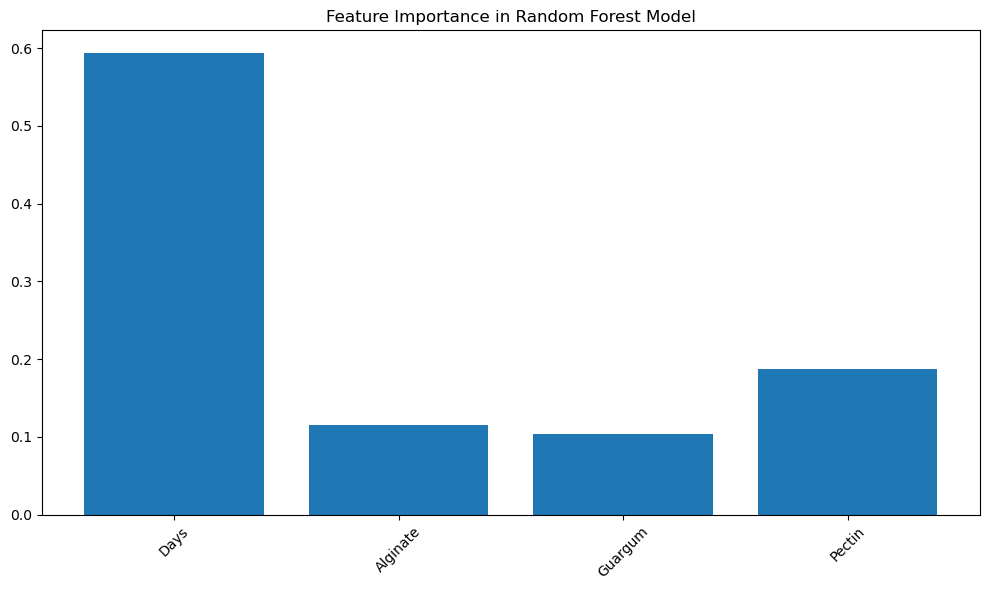

In [139]:
# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# Fit the model
rf_model.fit(x_train, y_train)

# Make predictions
rf_pred = rf_model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

# Print results
print('Random Forest Results:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

# Feature importance plot (optional)
plt.figure(figsize=(10, 6))
plt.bar(x.columns, rf_model.feature_importances_)
plt.xticks(rotation=45)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

c:\Users\saqli\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - loss: 147.0922 - val_loss: 121.8225
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 147.3984 - val_loss: 120.5017
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 138.0344 - val_loss: 119.2800
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 139.5475 - val_loss: 118.1460
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 137.4946 - val_loss: 116.9900
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 140.3928 - val_loss: 115.8238
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 137.5168 - val_loss: 114.5790
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 138.8193 - val_loss: 113.2848
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 127.9501 - val_loss: 111.9201
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 137.1236 - val_loss: 110.5041
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 121.8474 - val_loss: 109.0398
Epoch 12/100
2/2 ━━━━━━━

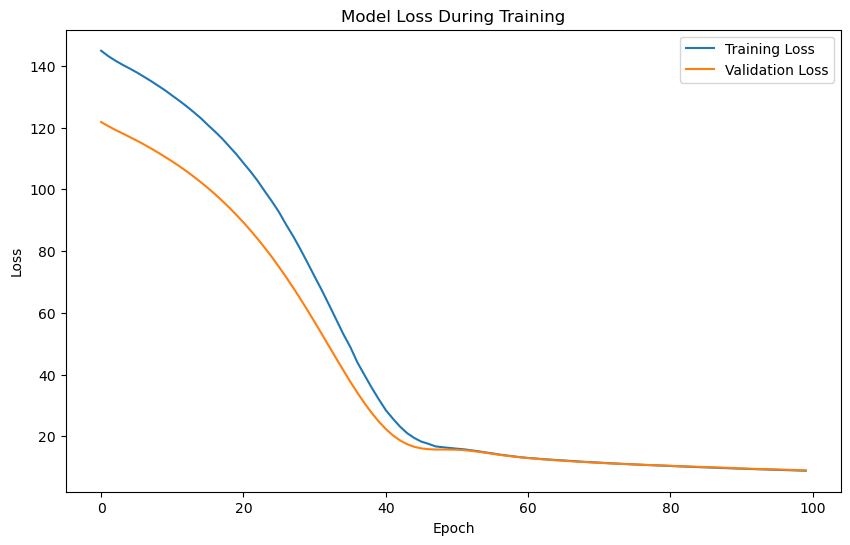

In [142]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Build the ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = ann_model.fit(
    X_train_scaled, 
    y_train, 
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Make predictions
ann_pred = ann_model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, ann_pred)
mae = mean_absolute_error(y_test, ann_pred)
r2 = r2_score(y_test, ann_pred)

# Print results
print('Neural Network Results:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [141]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/376.0 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 1.8/376.0 MB 3.9 MB/s eta 0:01:37
   ---------------------------------------- 1.8/376.0 MB 3.9 MB/s eta 0:01:37
   ---------------------------------------- 2.9/376.0 MB 3.1 MB/s eta 0:02:03
   ---------------------------------------- 3.4/376.0 MB 3.0 MB/s eta 0:02:04
   ---------------------------------------- 3.7/376.0 MB 2.9 MB/s eta 0:02:09
   ---------------------------------------- 3.7/376.0 MB 2.9 MB/s eta 0:02:09
   ---------------------------------------- 4.2/376.0 MB 2.4 MB/s eta 0:02:33
   ---------------------------------------- 4.5/376.0 MB 2.4 MB/s eta 0:02:38
    --------------------------------------- 5.5/376.0 MB 2.5 MB/s eta 0:02:31
    --------------------------------------- 6.0/376.0 MB 2.5 MB/s eta 0:02:31
